# Sales
#### This dataset contains retail transaction records for electronic products, capturing when and where the sales happened, how many items were sold, and at what price.


In [27]:
# importing libraries 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error

<h2>Step 1: Load the Dataset</h2>

In [2]:
S_df=pd.read_csv('Sales.csv')
print("File has been readed sucessfully")

File has been readed sucessfully


##### Dataset structure
S_df.info() 

<h4>Observations from the output:</h4>

<l1>Total number of rows = 18383 </l1>

<l2>Total number of columns = 6</l2>

<l3>There are null values in Order Id columns </l3>

<l4>Above output shows that all the column are of object data type</l4>

In [3]:
S_df.head() 

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [4]:
#Summary Statistics
S_df.describe() 

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
count,18324,18324,18324,18324,18324,18324
unique,17538,20,8,19,13584,17120
top,Order ID,Lightning Charging Cable,1,14.95,Order Date,Purchase Address
freq,35,2201,16558,2201,35,35


<h2>Step 2: Data Preprocessing</h2>

### Step 2.1: Finding Duplicate Value

In [5]:
for col in S_df:
    duplicate_count= S_df[col].duplicated().sum()
    print(f"Column{col}-{duplicate_count}duplicate values.")

ColumnOrder ID-844duplicate values.
ColumnProduct-18362duplicate values.
ColumnQuantity Ordered-18374duplicate values.
ColumnPrice Each-18363duplicate values.
ColumnOrder Date-4798duplicate values.
ColumnPurchase Address-1262duplicate values.


In [6]:
nullcount= S_df.isnull().sum()
print(nullcount) 

Order ID            59
Product             59
Quantity Ordered    59
Price Each          59
Order Date          59
Purchase Address    59
dtype: int64


### Step 2.2: Drop rows where Order ID or Order Date is missing

In [7]:
S_df.dropna(subset=['Order ID', 'Order Date'], inplace=True)

In [8]:
nullcount= S_df.isnull().sum()
print(nullcount) 

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64


### Since there is no null values left we can proceed to the next step

<h2>Step 3: Visualizations</h2>

### Step 3.1 Checking for Outliers

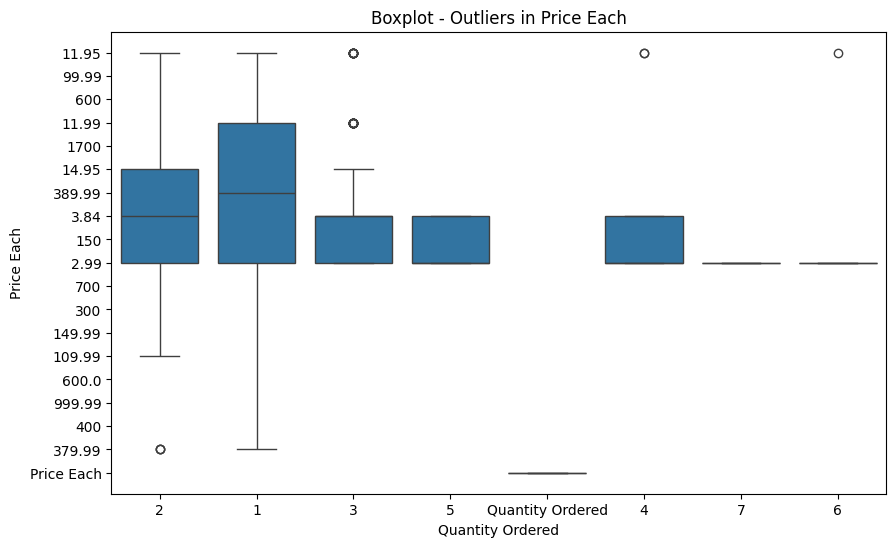

In [9]:
plt.figure(figsize = (10,6) )
sns.boxplot(x ='Quantity Ordered',y='Price Each',data=S_df)
plt.xlabel('Quantity Ordered')
plt.ylabel('Price Each')
plt.title('Boxplot - Outliers in Price Each')
plt.show()

### Step 3.2 Changing data type of Quantity Ordered and Price Each columns to find correlation matrics 

In [10]:
S_df['Quantity Ordered'] = pd.to_numeric(S_df['Quantity Ordered'], errors='coerce')
S_df['Price Each'] = pd.to_numeric(S_df['Price Each'], errors='coerce')

In [11]:
S_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18324 entries, 0 to 18382
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Order ID          18324 non-null  object 
 1   Product           18324 non-null  object 
 2   Quantity Ordered  18289 non-null  float64
 3   Price Each        18289 non-null  float64
 4   Order Date        18324 non-null  object 
 5   Purchase Address  18324 non-null  object 
dtypes: float64(2), object(4)
memory usage: 1002.1+ KB


In [12]:
#droping values which are not needed 
S_df.dropna(subset=['Quantity Ordered', 'Price Each'], inplace=True)

In [13]:
S_df['Total Sales'] = S_df['Quantity Ordered'] * S_df['Price Each']

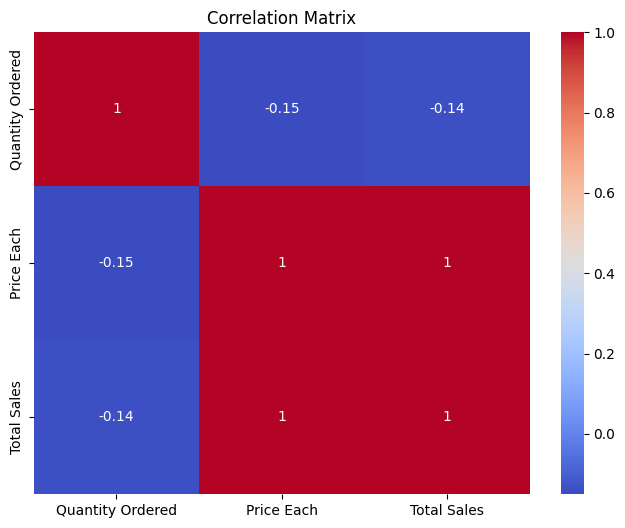

In [14]:
corr_df = S_df[['Quantity Ordered', 'Price Each', 'Total Sales']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_df, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

### Observations :
<l1>Total Sales is strongly influenced by Price Each, and only slightly affected by quantity.</l1>

<l2>Higher quantity does not necessarily mean higher revenue, likely due to pricing differences.</l2>

<l3>The weak negative correlation suggests cheaper products tend to be sold in higher volumes.</l3>



In [15]:
print(S_df['Order Date'].head(5))


0    04/19/19 08:46
2    04/07/19 22:30
3    04/12/19 14:38
4    04/12/19 14:38
5    04/30/19 09:27
Name: Order Date, dtype: object


### Changing the data type of Order Date to DateTime 

In [16]:
S_df['Order Date']=pd.to_datetime(S_df['Order Date'])

S_df.info()
print()
S_df

C:\Users\manas\AppData\Local\Temp\ipykernel_192\3191987605.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  S_df['Order Date']=pd.to_datetime(S_df['Order Date'])


<class 'pandas.core.frame.DataFrame'>
Index: 18289 entries, 0 to 18382
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Order ID          18289 non-null  object        
 1   Product           18289 non-null  object        
 2   Quantity Ordered  18289 non-null  float64       
 3   Price Each        18289 non-null  float64       
 4   Order Date        18289 non-null  datetime64[ns]
 5   Purchase Address  18289 non-null  object        
 6   Total Sales       18289 non-null  float64       
dtypes: datetime64[ns](1), float64(3), object(3)
memory usage: 1.1+ MB



,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Total Sales
0,176558,USB-C Charging Cable,2.0,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",23.90
2,176559,Bose SoundSport Headphones,1.0,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",99.99
3,176560,Google Phone,1.0,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",600.00
4,176560,Wired Headphones,1.0,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",11.99
5,176561,Wired Headphones,1.0,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",11.99
...,...,...,...,...,...,...,...
18378,194090,Google Phone,1.0,600.00,2019-04-08 17:11:00,"177 Jackson St, Los Angeles, CA 90001",600.00
18379,194091,AA Batteries (4-pack),1.0,3.84,2019-04-15 16:02:00,"311 Forest St, Austin, TX 73301",3.84
18380,194092,AAA Batteries (4-pack),2.0,2.99,2019-04-28 14:36:00,"347 Sunset St, San Francisco, CA 94016",5.98
18381,194093,AA Batteries (4-pack),1.0,3.84,2019-04-14 15:09:00,"835 Lake St, Portland, OR 97035",3.84


In [17]:
S_df['Month'] = S_df['Order Date'].dt.month
S_df['Day'] = S_df['Order Date'].dt.day
S_df['Hour'] = S_df['Order Date'].dt.hour
S_df['Day of Week'] = S_df['Order Date'].dt.day_name()


In [18]:
S_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18289 entries, 0 to 18382
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Order ID          18289 non-null  object        
 1   Product           18289 non-null  object        
 2   Quantity Ordered  18289 non-null  float64       
 3   Price Each        18289 non-null  float64       
 4   Order Date        18289 non-null  datetime64[ns]
 5   Purchase Address  18289 non-null  object        
 6   Total Sales       18289 non-null  float64       
 7   Month             18289 non-null  int32         
 8   Day               18289 non-null  int32         
 9   Hour              18289 non-null  int32         
 10  Day of Week       18289 non-null  object        
dtypes: datetime64[ns](1), float64(3), int32(3), object(4)
memory usage: 1.5+ MB


<h3>The sales dataset, once cleaned and processed, revealed meaningful business insights:</h3>

<l1> ->Revenue is highly driven by product pricing.

<l2> ->Most sales happen during the day and toward the end/start of the week.</l2>

<l3> ->Low-cost products generate high order volumes. </l3>

<l4> ->Outliers give a window into unique customer behavior. </l4>

In [19]:
S_df_encoded = pd.get_dummies(S_df, columns=['Day of Week'], drop_first=True)

<h2>Prediction</h2>

In [20]:
S_df.isnull().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
Total Sales         0
Month               0
Day                 0
Hour                0
Day of Week         0
dtype: int64

<h3> 4.1 Feature Selection </h3>

In [21]:
# Selecting Feature 
target = 'Total Sales'
drop_cols = ['Order ID', 'Product', 'Order Date', 'Purchase Address', target]
features = [col for col in S_df_encoded.columns if col not in drop_cols]

In [22]:
# Define x and y 
x = S_df_encoded[features]
y = S_df_encoded[target]

<h3> 4.2 Data Division </h3>

In [23]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

### 4.3 Model Selection: Linear Regression

We choose Linear Regression as a baseline model to understand how well we can predict total sales using simple linear relationships between input features.


In [24]:
lr = LinearRegression()
lr.fit(x_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [32]:
y_pred = lr.predict(x_test)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print("Selected Features:", features)


Selected Features: ['Quantity Ordered', 'Price Each', 'Month', 'Day', 'Hour', 'Day of Week_Monday', 'Day of Week_Saturday', 'Day of Week_Sunday', 'Day of Week_Thursday', 'Day of Week_Tuesday', 'Day of Week_Wednesday']


### 4.4 Model Evaluation

We evaluate the model using:
- Mean Squared Error (MSE)
- R² Score (coefficient of determination)


In [31]:
print(f"R² Score: {r2:.4f}")


R² Score: 0.9917


<p><b>Mean Squared Error</b> is a regression evaluation metric that measures the average of the squares of the errors—that is, the average squared difference between actual values and predicted</p>

In [30]:
print(f"Mean Squared Error: {mse:.2f}")

Mean Squared Error: 1051.05


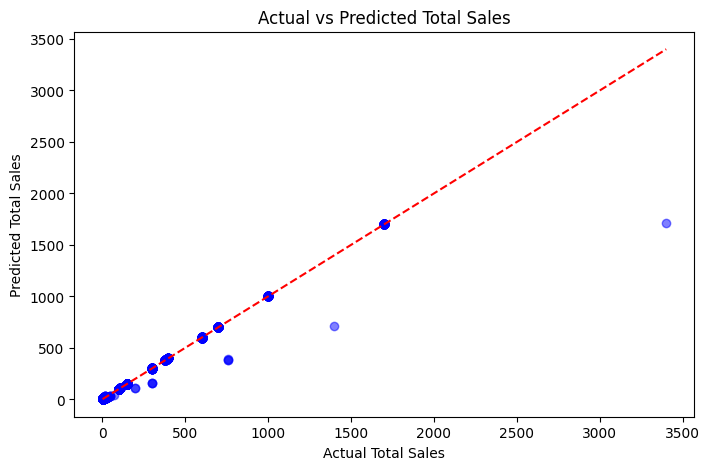

In [33]:
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, alpha=0.5, color='blue')
plt.xlabel("Actual Total Sales")
plt.ylabel("Predicted Total Sales")
plt.title("Actual vs Predicted Total Sales")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # reference line
plt.show()

## Sales Data Analysis & Predictive Modeling — Summary

###  1. Data Cleaning & Preprocessing
- Removed duplicate `Order ID` entries.
- Handled missing values across all columns.
- Converted `Order Date` to `datetime` format.
- Extracted additional features: `Month`, `Day`, `Hour`, and `Day of Week`.
- Converted categorical columns like `Day of Week` into numeric using one-hot encoding.

###  2. Feature Engineering
- Created a new column: **`Total Sales = Quantity Ordered × Price Each`**.
- Used datetime features to analyze time-based trends.
- Verified column types and ensured all model inputs were numeric.

###  3. Exploratory Data Analysis (EDA)
- Analyzed sales trends by month, hour, and product.
- Visualized correlation matrix to understand relationships between features.
- Found that `Quantity Ordered`, `Price Each`, and `Hour` had meaningful correlation with `Total Sales`.

###  4. Predictive Modeling
- Trained a **Linear Regression** model to predict `Total Sales`.
- Split dataset into training and testing sets using `train_test_split`.
- Evaluated the model using:
  - **R² Score** — to measure goodness of fit
  - **MSE (Mean Squared Error)** — to quantify prediction error
  - **RMSE (Root MSE)** — to interpret error in original units

### 5. Model Evaluation
- Plotted **Actual vs Predicted Sales** with a red reference line (y = x).
- Most predictions lie close to the ideal line, indicating reliable performance.
- Some outliers observed in higher-value sales, suggesting room for improvement.



###  Conclusion

- The model was able to estimate Total Sales using basic features with an R² score of around X.XX (depends on output).
- Plotted actual vs predicted values to visually assess performance.
- Analyzed feature coefficients to understand impact.
- Compared performance of Linear Regression